Open price correlation: -0.02512038336008146
Close price correlation: 0.013495506386173863

 Traditional method open price:
Coefficient: [[ 0.11621573  1.11113661 -0.13121718 -0.12109243]]
Root mean squared error = 0.0385
R-square = 0.9863

 Sentiment method open price:
Coefficient: [[-0.0948064]]
Root mean squared error = 0.2957
R-square = -0.0063

 Hybrid method open price:
Coefficient: [[ 5.51606696e-02  1.05566844e+00 -1.03116128e-01 -1.99068894e-02
   5.35273753e-03 -2.91873450e-04]]
Root mean squared error = 0.0383
R-square = 0.9867

Traditional Method close price:
Coefficient: [[ 0.05587553  1.15823992 -0.07788529 -0.1575462 ]]
Root mean squared error = 0.0818
R-square = 0.9312

 Sentiment method close price:
Coefficient: [[0.02129498]]
Root mean squared error = 0.3307
R-square = -0.0215

Hybrid Method close price:
Coefficient: [[ 0.02636462  1.09322814  0.16005839 -0.29549257  0.07130332 -0.05717165]]
Root mean squared error = 0.0507
R-square = 0.9717


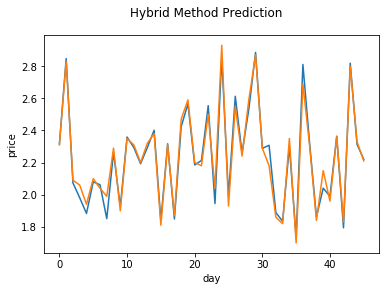

In [1]:
import pandas as pd
import copy
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.dummy import DummyRegressor



result=pd.read_csv('../data/merged_AMD.csv')
print("Open price correlation:", result['Open'].corr(result['open_score']))
print("Close price correlation:", result['Close'].corr(result['close_score']))

df=copy.deepcopy(result)

df = df[['Open',  'Close', 'High',  'Low',  'open_score', 'close_score']]
forecast_col = ['Open',  'High',  'Low',  'Close']

forecast = 1

df['ForecastOpen'] = df[forecast_col[0]].shift(-forecast)
df['ForecastClose'] = df[forecast_col[1]].shift(-forecast)

data=copy.deepcopy(df)

X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)

print("\n Traditional method open price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))


# sentiment open price
df=copy.deepcopy(data)
X = np.array(df[['open_score']])
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
print("\n Sentiment method open price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))


# hybrid open price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastOpen']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
confidence = clf.score(X_test, y_test)
print("\n Hybrid method open price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))


#traditional close price
df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose','open_score','close_score'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)

prediction = clf.predict(X_test)

confidence = clf.score(X_test, y_test)
print("\nTraditional Method close price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))



# sentimental close price
df=copy.deepcopy(data)
X = np.array(df[['close_score']])
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
confidence = clf.score(X_test, y_test)*1

print("\n Sentiment method close price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))


df=copy.deepcopy(data)
X = np.array(df.drop(['ForecastOpen', 'ForecastClose'], 1))
X = X[:-forecast]
df.dropna(inplace=True)

y = np.array(df[['ForecastClose']])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = LinearRegression(n_jobs=-1)
reg = clf.fit(X_train, y_train)
confidence = clf.score(X_test, y_test)

prediction = clf.predict(X_test)

print("\nHybrid Method close price:")
print("Coefficient:", reg.coef_)
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, prediction)))
print("R-square = %.4f" % r2_score(y_test, prediction))
result = prediction.ravel() 



predictions_dataframe1 = pd.DataFrame(data=prediction[0:], columns=['Predicted Price'])
a = plt.plot(predictions_dataframe1,  label="test1")
plt.plot(pd.DataFrame(y_test[0:]) )
plt.suptitle('Hybrid Method Prediction')
plt.xlabel('day')
plt.ylabel("price")
plt.show()





